In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style('darkgrid')
sns.set(font_scale=1.3)

from pathlib import Path

### Merge files

Add a new column to the data containing the month of the initial file

In [34]:
month_list = ['Dec-19', 'Jan-20', 'Feb-20', 'Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 
'Oct-20', 'Nov-20', 'Dec-20', 'Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21', 'Jun-21', 'Jul-21', 
'Aug-21', 'Sep-21', 'Oct-21', 'Nov-21', 'Dec-21', 'Jan-22', 'Feb-22']

our_files =Path('C:\\Users\\Susan\\njeri ds\\Omdena\\conventry chapter\\coventry-chapter-effects-of-weather-main\\src\\data\\NHS Files London')

full_df = pd.DataFrame()
n=0
for file in our_files.iterdir():
    df = pd.read_excel(file)
    df['data_month'] = month_list[n]
    full_df = pd.concat([full_df, df], ignore_index=True)
    n = n+1

In [22]:
full_df.shape

(188330, 12)

In [47]:
full_df.to_csv('merged_mental_data1.csv', index=False)

### Cleaning and wrangling

In [48]:
data = pd.read_csv('merged_mental_data1.csv')

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188330 entries, 0 to 188329
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   REPORTING_PERIOD_START       188330 non-null  object
 1   REPORTING_PERIOD_END         188330 non-null  object
 2   STATUS                       188330 non-null  object
 3   BREAKDOWN                    188330 non-null  object
 4   PRIMARY_LEVEL                188330 non-null  object
 5   PRIMARY_LEVEL_DESCRIPTION    188330 non-null  object
 6   SECONDARY_LEVEL              188330 non-null  object
 7   SECONDARY_LEVEL_DESCRIPTION  188330 non-null  object
 8   MEASURE_ID                   188330 non-null  object
 9   MEASURE_NAME                 188330 non-null  object
 10  MEASURE_VALUE                188330 non-null  object
 11  data_month                   188330 non-null  object
dtypes: object(12)
memory usage: 17.2+ MB


In [50]:
data.describe()

,REPORTING_PERIOD_START,REPORTING_PERIOD_END,STATUS,BREAKDOWN,PRIMARY_LEVEL,PRIMARY_LEVEL_DESCRIPTION,SECONDARY_LEVEL,SECONDARY_LEVEL_DESCRIPTION,MEASURE_ID,MEASURE_NAME,MEASURE_VALUE,data_month
count,188330,188330,188330,188330,188330,188330,188330,188330,188330,188330,188330,188330
unique,32,27,3,39,29,36,230,242,259,269,5001,27
top,2021-01-12,31/01/2022,Final,Provider,93C,NHS NORTH CENTRAL LONDON CCG,NONE,NONE,MHS26,Days of delayed discharge in RP,*,Jan-22
freq,8506,9373,136371,79571,13053,13053,74233,121033,12309,12309,93179,9373


In [51]:
data.head(3)

,REPORTING_PERIOD_START,REPORTING_PERIOD_END,STATUS,BREAKDOWN,PRIMARY_LEVEL,PRIMARY_LEVEL_DESCRIPTION,SECONDARY_LEVEL,SECONDARY_LEVEL_DESCRIPTION,MEASURE_ID,MEASURE_NAME,MEASURE_VALUE,data_month
0,2019-12-01,2019-12-31 00:00:00,Final,Provider,RKL,WEST LONDON NHS TRUST,NONE,NONE,MHS30c,Attended contacts with memory services team in...,995,Dec-19
1,2019-12-01,2019-12-31 00:00:00,Final,Provider,RQY,SOUTH WEST LONDON AND ST GEORGE'S MENTAL HEALT...,NONE,NONE,MHS30c,Attended contacts with memory services team in...,995,Dec-19
2,2019-12-01,2019-12-31 00:00:00,Final,Provider,RAT,NORTH EAST LONDON NHS FOUNDATION TRUST,18,NONE,ACC37,Proportion of people assigned to an adult MH c...,99,Dec-19


##### Replace * in measure value into NaN and make it float datatype

In [52]:
data['MEASURE_VALUE'] = data['MEASURE_VALUE'].replace('*', np.nan)
data['MEASURE_VALUE'] = data['MEASURE_VALUE'].astype('float')

In [53]:
data.describe()

,MEASURE_VALUE
count,95151.000000
mean,1637.416801
std,6429.295587
min,1.000000
25%,25.000000
50%,80.000000
75%,410.000000
max,102105.000000


##### Convert the two date columns to datetime

In [54]:
data['REPORTING_PERIOD_START'].value_counts()

2021-01-12    8506
2021-01-11    8365
2021-01-10    8352
2021-01-09    7939
2021-01-07    7859
2021-01-08    7845
2021-01-03    7824
2021-01-02    7804
2021-01-05    7768
2021-01-06    7739
2021-01-01    7646
2020-01-10    7642
2020-01-11    7632
2020-01-09    7632
2021-01-04    7619
2020-01-08    7618
2020-01-12    7610
2020-01-07    7310
2020-01-05    7090
2022-01-01    5884
2020-06-01    5076
2020-01-04    4872
2020-01-02    4264
2020-01-03    4258
2020-01-01    4076
2019-12-01    3415
2020-04-01    2682
2020-01-06    2226
2022-01-02    1764
2019-11-01     671
2019-10-01     671
2019-01-12     671
Name: REPORTING_PERIOD_START, dtype: int64

In [55]:
#create new column 'period start'.
# We have to explicitly define the format because pandas infers the format for each date,
# but might mix up because it is not obvious which is the day and month

data['period_start'] = pd.to_datetime(data['REPORTING_PERIOD_START'], format='%Y-%d-%m')
data.loc[(data['REPORTING_PERIOD_START'] == '2020-06-01') | 
         (data['REPORTING_PERIOD_START'] == '2019-12-01') | 
         (data['REPORTING_PERIOD_START'] == '2020-04-01') | 
         (data['REPORTING_PERIOD_START'] == '2019-11-01') | 
         (data['REPORTING_PERIOD_START'] == '2019-10-01'), 'period_start'] = pd.to_datetime(data['REPORTING_PERIOD_START'], 
                                                                                          format='%Y-%m-%d')

In [59]:
data['period_start'].sample(5)

158344   2021-09-01
5214     2020-01-01
77823    2020-12-01
179506   2022-01-01
128928   2021-07-01
Name: period_start, dtype: datetime64[ns]

In [61]:
data['REPORTING_PERIOD_END'].value_counts()

31/01/2022             9373
31/12/2021             8995
31/10/2021             8535
30/11/2021             8533
30/09/2021             8250
31/07/2021             8169
31/08/2021             8157
2020-06-30 00:00:00    7758
30/06/2021             7619
31/10/2020             7331
31/03/2021             7327
30/09/2020             7320
30/11/2020             7313
31/07/2020             7310
31/08/2020             7308
31/01/2021             7301
28/02/2021             7301
31/12/2020             7282
31/05/2021             7168
30/04/2021             7139
30/04/2020             5726
31/05/2020             5718
28/02/2022             5079
2020-01-31 00:00:00    4087
2019-12-31 00:00:00    4086
29/02/2020             4081
31/03/2020             4064
Name: REPORTING_PERIOD_END, dtype: int64

In [62]:
# create new column 'period end'
# Pandas will infer the date from each column, no need to specify 
# because it is obvious which is the year, day and month for each date

data['period_end'] = pd.to_datetime(data['REPORTING_PERIOD_END'])

In [63]:
data.head(3)

,REPORTING_PERIOD_START,REPORTING_PERIOD_END,STATUS,BREAKDOWN,PRIMARY_LEVEL,PRIMARY_LEVEL_DESCRIPTION,SECONDARY_LEVEL,SECONDARY_LEVEL_DESCRIPTION,MEASURE_ID,MEASURE_NAME,MEASURE_VALUE,data_month,period_start,period_end
0,2019-12-01,2019-12-31 00:00:00,Final,Provider,RKL,WEST LONDON NHS TRUST,NONE,NONE,MHS30c,Attended contacts with memory services team in...,995.0,Dec-19,2019-12-01,2019-12-31
1,2019-12-01,2019-12-31 00:00:00,Final,Provider,RQY,SOUTH WEST LONDON AND ST GEORGE'S MENTAL HEALT...,NONE,NONE,MHS30c,Attended contacts with memory services team in...,995.0,Dec-19,2019-12-01,2019-12-31
2,2019-12-01,2019-12-31 00:00:00,Final,Provider,RAT,NORTH EAST LONDON NHS FOUNDATION TRUST,18,NONE,ACC37,Proportion of people assigned to an adult MH c...,99.0,Dec-19,2019-12-01,2019-12-31


#### Get the difference in days between the two dates (period end - period start) to get the data time-scope for each row

In [69]:
(data['period_end'] - data['period_start']).value_counts()

30 days     76763
29 days     39811
91 days     36143
90 days     12089
89 days      8283
27 days      6839
28 days      3410
364 days     2607
88 days      2385
dtype: int64

In [65]:
data['period_diff'] = (data['period_end'] - data['period_start'])/np.timedelta64(1, 'D')
data['period_diff'] = data['period_diff'].astype(int)

In [66]:
data['period_diff'].value_counts().sort_index()

27      6839
28      3410
29     39811
30     76763
88      2385
89      8283
90     12089
91     36143
364     2607
Name: period_diff, dtype: int64

###### Note from above 
we have rows that represent monthly data (27,28,29,30), quartely (88,89,90,91), and yearly(364)

#### Clean-up the df structure: Drop the original date columns, change the column names so no need to scroll right

In [70]:
data.drop(['REPORTING_PERIOD_START','REPORTING_PERIOD_END'], axis=1, inplace=True)

In [71]:
#Convert column names to lower case and replace hyphen with a space

data.columns = data.columns.str.lower().str.replace('_', ' ')

In [72]:
data.head()

,status,breakdown,primary level,primary level description,secondary level,secondary level description,measure id,measure name,measure value,data month,period start,period end,period diff
0,Final,Provider,RKL,WEST LONDON NHS TRUST,NONE,NONE,MHS30c,Attended contacts with memory services team in...,995.0,Dec-19,2019-12-01,2019-12-31,30
1,Final,Provider,RQY,SOUTH WEST LONDON AND ST GEORGE'S MENTAL HEALT...,NONE,NONE,MHS30c,Attended contacts with memory services team in...,995.0,Dec-19,2019-12-01,2019-12-31,30
2,Final,Provider,RAT,NORTH EAST LONDON NHS FOUNDATION TRUST,18,NONE,ACC37,Proportion of people assigned to an adult MH c...,99.0,Dec-19,2019-12-01,2019-12-31,30
3,Final,Provider,RQY,SOUTH WEST LONDON AND ST GEORGE'S MENTAL HEALT...,18,NONE,ACC37,Proportion of people assigned to an adult MH c...,99.0,Dec-19,2019-12-01,2019-12-31,30
4,Final,Provider,RWK,EAST LONDON NHS FOUNDATION TRUST,NONE,NONE,MHS29a,Contacts with perinatal MH team in the Reporti...,985.0,Dec-19,2019-12-01,2019-12-31,30


#### Separate the data into three groups: monthly, quartely and yearly

In [73]:
mdf = data[data['period diff'] <= 31]
qdf = data[(data['period diff'] > 85) & (data['period diff'] <= 91)]
ydf = data[data['period diff'] > 360]

## Based on Anshul's Slack communication:

***..."The specific indicator name (in column I and J) you will need to look for is:
MHS01
People in contact with services at the end of the reporting period.
If you want the split for adults/children, use:
AMH01,
People in contact with adult mental health services at the end of the reporting period.
CYP01,
People in contact with children and young people's mental health services at the end of the reporting period.
(FYI, the number of adult + CYP figures will not add up to the same as the total due to unknown/missing/other data)
You also need to filter column F for the 5 London CCGs."***


We need data:
- For the 3 indicator names (column: measure ID): MHS01 (All adults and children), AMH01(adults only), and CYP01(children only)
- from the 5 London CCGs (column: primary level description)

In [78]:
mdf[mdf['measure id'].isin(['MHS01','AMH01','CYP01'])].shape

(1082, 13)

In [79]:
qdf[qdf['measure id'].isin(['MHS01','AMH01','CYP01'])].shape

(0, 13)

In [80]:
ydf[ydf['measure id'].isin(['MHS01','AMH01','CYP01'])].shape

(0, 13)

We see that only the monthly data has the measures we need

## Monthly data EDA

In [81]:
ccg = mdf[mdf['primary level description'].str.contains('CCG')]
ccg.shape

(45554, 13)

In [82]:
ccg['primary level description'].value_counts().sort_index()

NHS CENTRAL LONDON (WESTMINSTER) CCG    5647
NHS NORTH CENTRAL LONDON CCG            8821
NHS NORTH EAST LONDON CCG               3986
NHS NORTH WEST LONDON CCG               4094
NHS SOUTH EAST LONDON CCG               8735
NHS SOUTH WEST LONDON CCG               8640
NHS WEST LONDON CCG                     5631
Name: primary level description, dtype: int64

In [83]:
m_ccg = ccg[ccg['measure id'].isin(['MHS01','AMH01','CYP01'])]
m_ccg.shape

(354, 13)

In [84]:
m_ccg.head()

,status,breakdown,primary level,primary level description,secondary level,secondary level description,measure id,measure name,measure value,data month,period start,period end,period diff
95,Final,CCG - GP Practice or Residence,08Y,NHS WEST LONDON CCG,NONE,NONE,CYP01,People in contact with children and young peop...,865.0,Dec-19,2019-12-01,2019-12-31,30
498,Final,CCG - GP Practice or Residence,09A,NHS CENTRAL LONDON (WESTMINSTER) CCG,NONE,NONE,CYP01,People in contact with children and young peop...,600.0,Dec-19,2019-12-01,2019-12-31,30
870,Final,CCG - GP Practice or Residence,08Y,NHS WEST LONDON CCG,NONE,NONE,MHS01,People in contact with services at the end of ...,4930.0,Dec-19,2019-12-01,2019-12-31,30
985,Final,CCG - GP Practice or Residence,09A,NHS CENTRAL LONDON (WESTMINSTER) CCG,NONE,NONE,MHS01,People in contact with services at the end of ...,4440.0,Dec-19,2019-12-01,2019-12-31,30
1034,Final,CCG - GP Practice or Residence,08Y,NHS WEST LONDON CCG,NONE,NONE,AMH01,People in contact with adult mental health ser...,4070.0,Dec-19,2019-12-01,2019-12-31,30


In [85]:
m_ccg.describe(include='object')

,status,breakdown,primary level,primary level description,secondary level,secondary level description,measure id,measure name,data month
count,354,354,354,354,354,354,354,354,354
unique,2,1,7,7,1,1,3,4,26
top,Final,CCG - GP Practice or Residence,72Q,NHS NORTH CENTRAL LONDON CCG,NONE,NONE,CYP01,People in contact with adult mental health ser...,Dec-20
freq,264,354,66,66,354,354,118,118,15


Remove columns with only one unique value. We also do not need the measure name which describes the measure id

In [86]:
df = m_ccg.drop(['breakdown','secondary level','secondary level description','measure name'], axis=1)
df

,status,primary level,primary level description,measure id,measure value,data month,period start,period end,period diff
95,Final,08Y,NHS WEST LONDON CCG,CYP01,865.0,Dec-19,2019-12-01,2019-12-31,30
498,Final,09A,NHS CENTRAL LONDON (WESTMINSTER) CCG,CYP01,600.0,Dec-19,2019-12-01,2019-12-31,30
870,Final,08Y,NHS WEST LONDON CCG,MHS01,4930.0,Dec-19,2019-12-01,2019-12-31,30
985,Final,09A,NHS CENTRAL LONDON (WESTMINSTER) CCG,MHS01,4440.0,Dec-19,2019-12-01,2019-12-31,30
1034,Final,08Y,NHS WEST LONDON CCG,AMH01,4070.0,Dec-19,2019-12-01,2019-12-31,30
...,...,...,...,...,...,...,...,...,...
174995,Performance,A3A8R,NHS NORTH EAST LONDON CCG,CYP01,11710.0,Jan-22,2022-01-01,2022-01-31,30
175105,Performance,A3A8R,NHS NORTH EAST LONDON CCG,MHS01,58165.0,Jan-22,2022-01-01,2022-01-31,30
175299,Performance,W2U3Z,NHS NORTH WEST LONDON CCG,AMH01,37955.0,Jan-22,2022-01-01,2022-01-31,30
175324,Performance,W2U3Z,NHS NORTH WEST LONDON CCG,CYP01,10730.0,Jan-22,2022-01-01,2022-01-31,30


### Bargraphs of measure value per CCG. For each CCG, there'll be a barplot for both adults and children, adult only, and children children only.

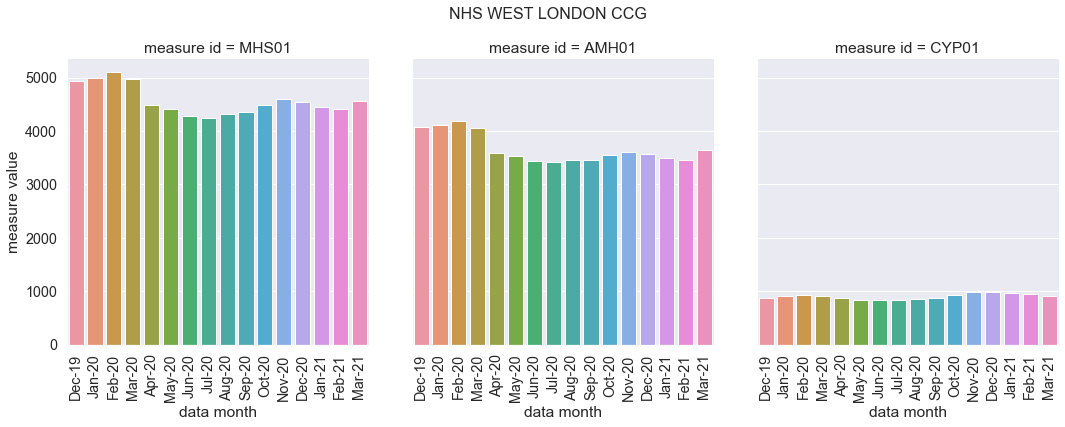

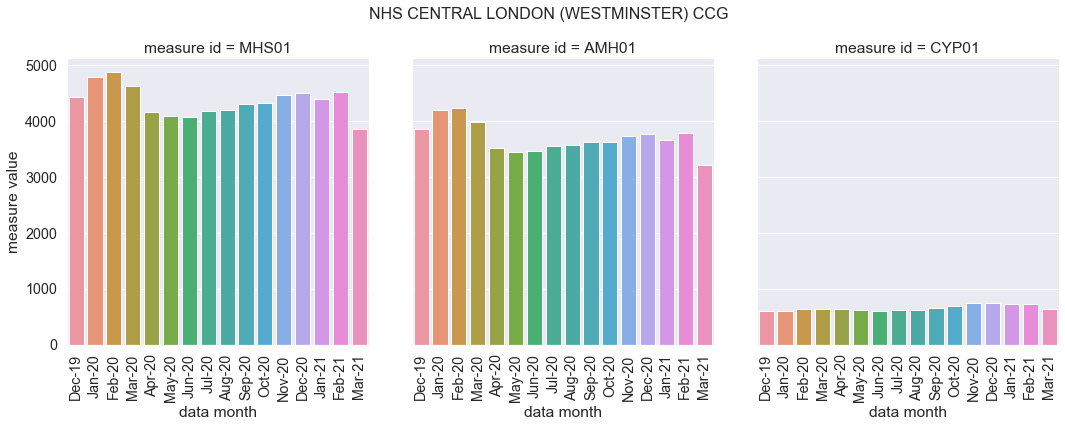

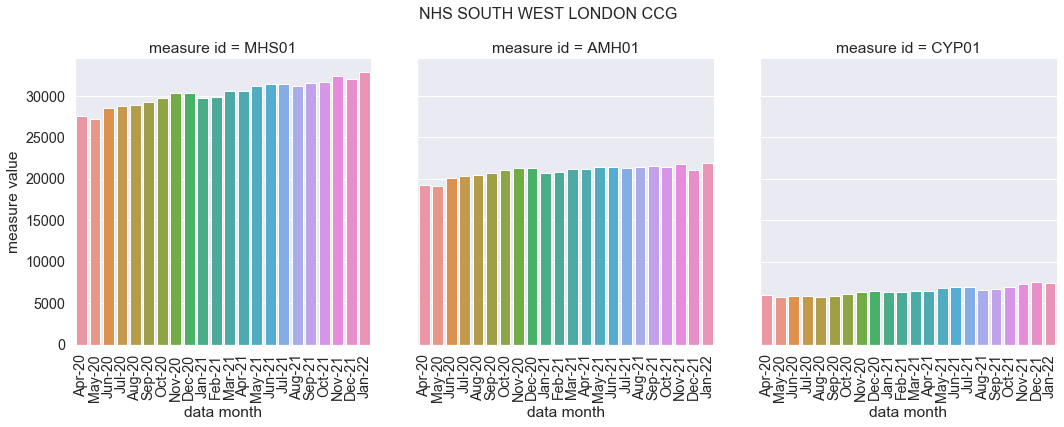

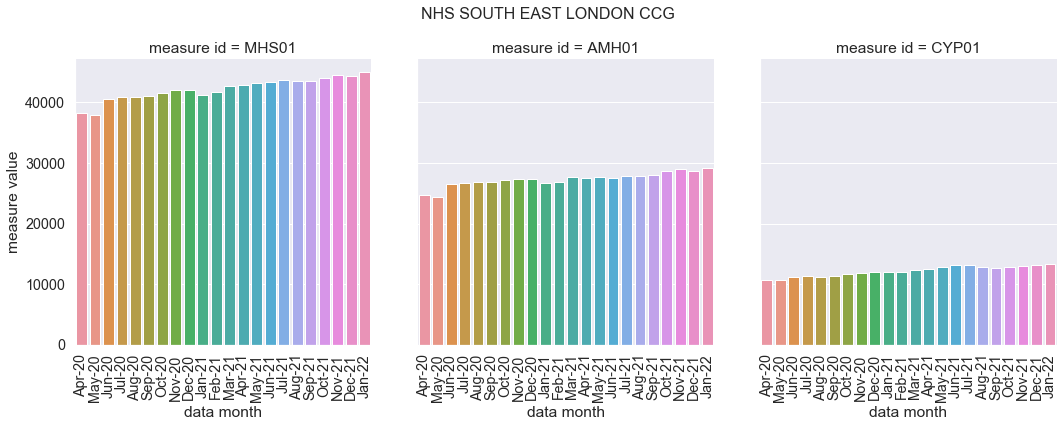

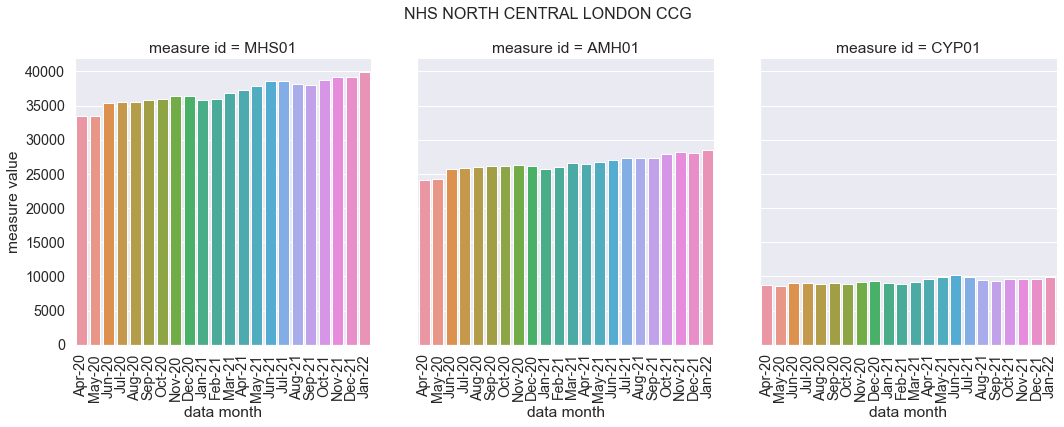

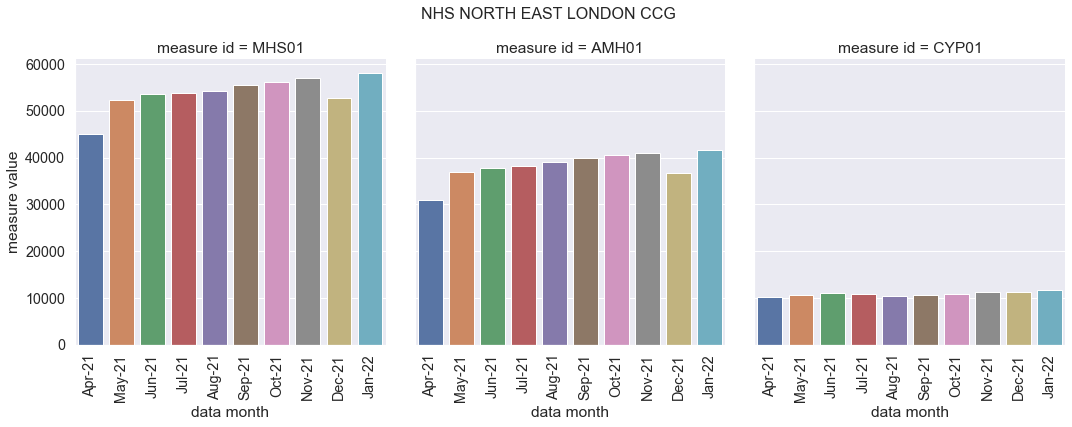

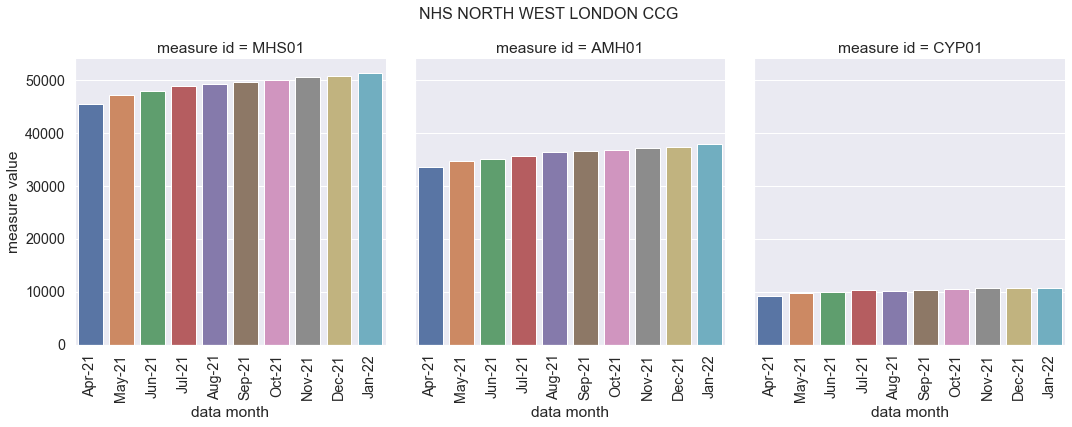

In [87]:
n = 0
centers = df['primary level description'].unique()
for c in centers:
    a = df[df['primary level description'] == centers[n]]
    g = sns.catplot(x='data month', 
                    y='measure value', 
                    data=a, kind='bar', 
                    col='measure id', 
                    col_order=['MHS01','AMH01','CYP01']);
    g.set_xticklabels(rotation=90)
    g.fig.suptitle(centers[n], size=16, y=1.05)
    n=n+1

### Line plot of the monthly measure values segmented by the CCGs. We see that data is available for different CCGs for different months.
- NHS west london and NHS central london: Dec 2019-march 2021
- NHS SW london, NHS SE and NHS North central: Apr 2020-jan2022.
- NHS north east and NHS north west: Apr 2021-jan 2022.

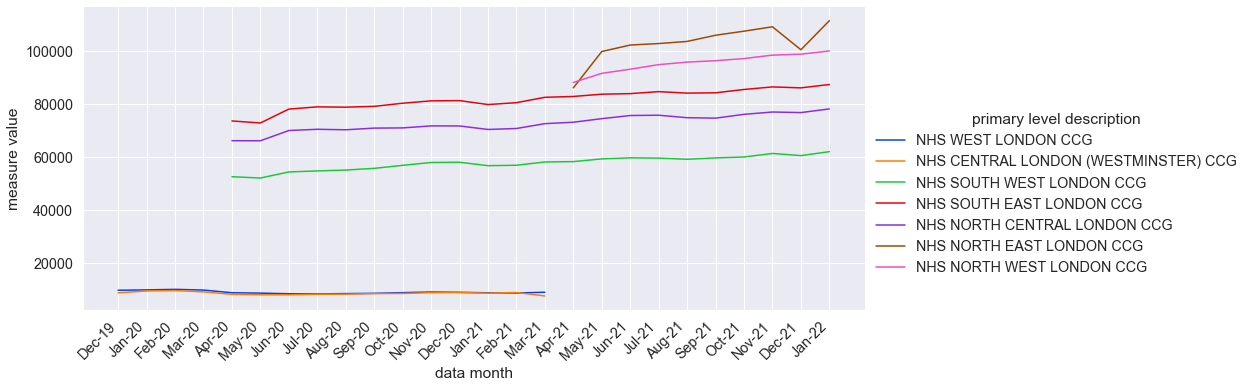

In [88]:
sns.relplot(x='data month', y='measure value',data=df, 
            kind='line', aspect=2.5, 
            hue='primary level description', 
            palette='bright', 
            estimator=sum,
           ci=None)
plt.xticks(rotation=45, ha='right');

### Line plots for the different groups: Everyone, adults only and children only.

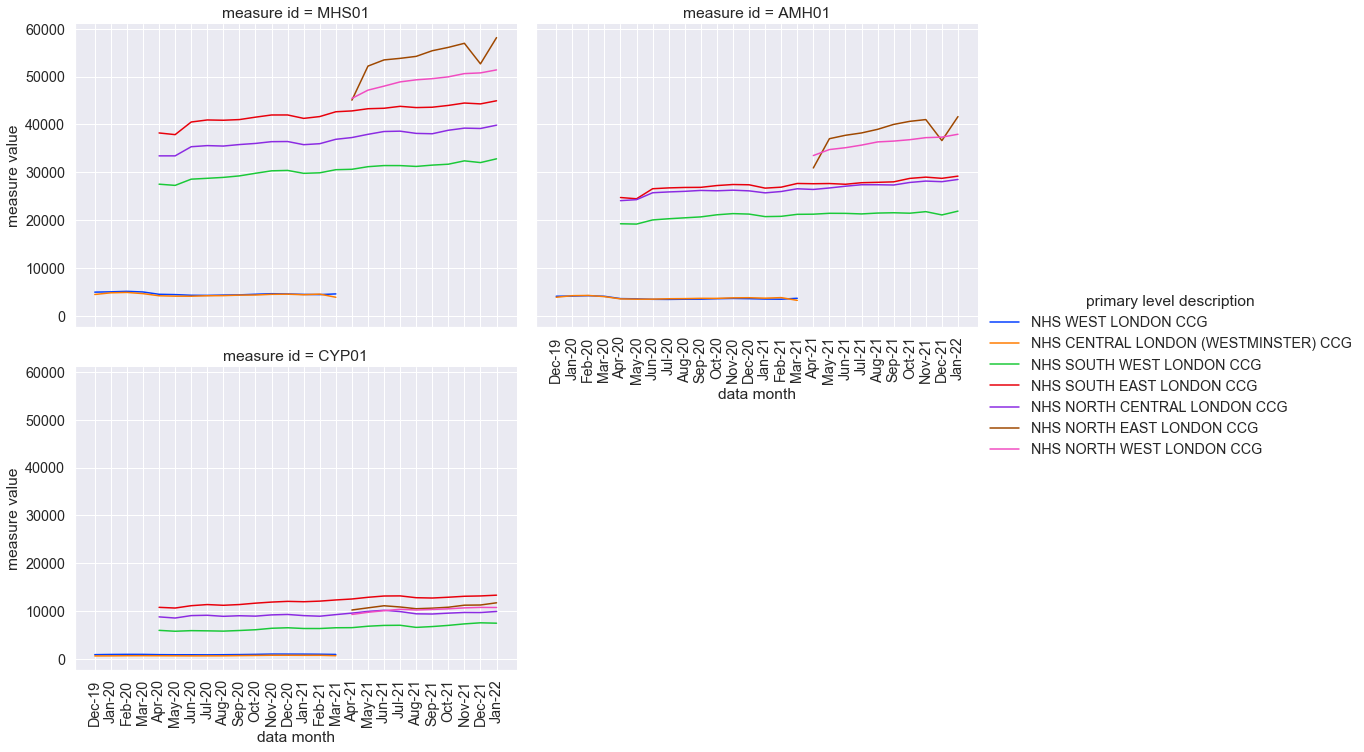

In [89]:
g = sns.relplot(x='data month', y='measure value',data=df, 
            kind='line',  
            hue='primary level description', 
            col='measure id',
            col_order = ['MHS01', 'AMH01','CYP01'],
            col_wrap = 2,
            palette='bright', 
            estimator=sum,
            ci=None,
            aspect=1.4)
g.set_xticklabels(rotation=90);